# Solar System Simulation Tutorial

This tutorial aims to provide information to the user about the general N-Body Simulation that can be performed using the **cosmicBallet** package. The mathematical foundation for the N-Body Problem is Newton's Law of Gravity given by:
\begin{equation}
m_i \frac{d^2 x_i}{dt^2} = \sum_{\underset{j\neq i}{j=1}}^{N}\frac{Gm_i m_j}{||x_j - x_i||_2^3}(x_j - x_i)
\end{equation}

## Import the Necessary Libraries

In [1]:
import cosmicBallet.utils.Constants as const
from cosmicBallet.MaterialProperty import MaterialProperty
from cosmicBallet.CelestialObjects import Planets, Stars
from cosmicBallet.Conversion import mass_conversion, distance_conversion, velocity_conversion
from cosmicBallet.NBodySimulator import Simulator
import numpy as np

QStandardPaths: wrong permissions on runtime directory /run/user/1000/, 0755 instead of 0700


## Create the Material Property Dictionary

Create a dictionary for the cummalative material properties of the planets in the solar system. Use the MaterialProperty class to generate cummulative properties for each planet. This is necessary for collision dynamics.

In our case, certain assumptions can be made, that the inner planets all mainly consist of iron-nickel and silicates of the same composition, and the outer planets are purely made of methane-ice (although inaccurate, it suffices for our case as there are no collisions between the planets in the solar system). Currently, the only available materials are iron-nickel, silicates, water-ice, methane-ice and ammonia-ice for automated conversions. If other materials are needed, it needs to be manually calculated and provided as inputs.

In [2]:
inner_planet_properties = ["silicates", "iron_nickel"]
outer_planet_properties = ["methane_ice"]
composition_ratio = [0.3, 0.7] # 30% silicates, 70% iron-nickel
composition_ratio_outer = [1.0] # 100% methane ice
material_property_inner = MaterialProperty(inner_planet_properties, composition_ratio).planet_material_property()
material_property_outer = MaterialProperty(outer_planet_properties, composition_ratio_outer).planet_material_property()

## Initialize the Celestial Objects

Initialize objects for all Planets and the Sun in the Solar System. First, if the positions / velocities of the objects in SI Units are unknown, use the functions available in the Conversion module of the package. Here, we use the position and velocities of the planets and the sun as of the 1st of January, 2000 (provided by NASA's Jet Propulsion Laboratory). The initial conditions of all objects are:

- Sun
    * Position: [0,0,0] AU
    * Velocity: [0.01275,0,0] AU/day

- Mercury
    * Position: [−0.1303,0.4517,0.0217] AU
    * Velocity: [−0.0205+0.01275,−0.0061,0.0023] AU/day

- Venus
    * Position: [0.6820,−0.2922,−0.0420] AU
    * Velocity: [0.0080+0.01275,0.0199,0.0002] AU/day

- Earth
    * Position: [−0.1843,0.9642,0.0000] AU
    * Velocity: [−0.0172+0.01275,−0.0032,0.0000] AU/day

- Mars
    * Position: [1.3838,−0.0106,−0.0361] AU
    * Velocity: [0.0003+0.01275,0.0149,0.0000] AU/day

- Jupiter
    * Position: [4.0011,2.9350,−0.1018] AU
    * Velocity: [−0.0048+0.01275,0.0069,0.0001] AU/day

- Saturn
    * Position: [6.4061,6.5632,−0.3684] AU
    * Velocity: [−0.0038+0.01275,0.0035,0.0002] AU/day

- Uranus
    * Position: [14.4313,−13.7343,−0.2381] AU
    * Velocity: [0.0027+0.01275,0.0028,−0.0001] AU/day

- Neptune
    * Position: [16.8121,−24.9923,0.1277] AU
    * Velocity: [0.0026+0.01275,0.0017,−0.0001] AU/day

In [3]:
position_list = [np.array([0,0,0]), np.array([-0.1303,0.4517,0.0217]), np.array([0.6820,-0.2922,-0.0420]), 
                 np.array([-0.1843,0.9642,0.0000]), np.array([1.3838,-0.0106,-0.0361]), np.array([4.0011,2.9350,-0.1018]), 
                 np.array([6.4061,6.5632,-0.3684]), np.array([14.4313,-13.7343,-0.2381]), 
                 np.array([16.8121,-24.9923,0.1277])]
velocity_list = [np.array([0.01275,0,0]), np.array([-0.0205+0.01275,-0.0061,0.0023]), 
                 np.array([0.0080+0.01275,0.0199,0.0002]), np.array([-0.0172+0.01275,-0.0032,0.0000]), 
                 np.array([0.0003+0.01275,0.0149,0.0000]), np.array([-0.0048+0.01275,0.0069,0.0001]),
                 np.array([-0.0038+0.01275,0.0035,0.0002]), np.array([0.0027+0.01275,0.0028,-0.0001]), 
                 np.array([0.0026+0.01275,0.0017,-0.0001])]
position_list_si = distance_conversion(distance_list=position_list,
                                       unit = "AU") 
velocity_list_si = velocity_conversion(velocity_list=velocity_list,
                                       unit="AUpD")   

In [4]:
Sun = Stars(name="Sun", mass=const.MS, temperature=5300, init_position=list(position_list[0]),
            init_velocity=list(velocity_list_si[0]), radius=6.95508e8)
Mercury = Planets(name="Mercury", mass=0.0553*const.ME, radius=2.4397e6, init_position=list(position_list_si[1]),
                  init_velocity=list(velocity_list_si[1]), material_property=material_property_inner,
                  planet_type="Rocky", planet_contour="Mars-like")
Venus = Planets(name="Venus", mass=0.815*const.ME, radius=0.949*6.4e6, init_position=list(position_list_si[2]),
                  init_velocity=list(velocity_list_si[2]), material_property=material_property_inner,
                  planet_type="Rocky", planet_contour="Mars-like")
Earth = Planets(name="Earth", mass=1*const.ME, radius=6.4e6, init_position=list(position_list_si[3]),
                  init_velocity=list(velocity_list_si[3]), material_property=material_property_inner,
                  planet_type="Rocky", planet_contour="Earth-like")
Mars = Planets(name="Mars", mass=0.107*const.ME, radius=0.532*6.4e6, init_position=list(position_list_si[4]),
                  init_velocity=list(velocity_list_si[4]), material_property=material_property_inner,
                  planet_type="Rocky", planet_contour="Mars-like")
Jupiter = Planets(name="Jupiter", mass=317.8*const.ME, radius=11.21*6.4e6, init_position=list(position_list_si[5]),
                  init_velocity=list(velocity_list_si[5]), material_property=material_property_outer,
                  planet_type="Gaseous", planet_contour="Jupiter-like")
Saturn = Planets(name="Saturn", mass=95.2*const.ME, radius=9.45*6.4e6, init_position=list(position_list_si[6]),
                  init_velocity=list(velocity_list_si[6]), material_property=material_property_outer,
                  planet_type="Gaseous", planet_contour="Jupiter-like")
Uranus = Planets(name="Uranus", mass=14.5*const.ME, radius=4.01*6.4e6, init_position=list(position_list_si[7]),
                  init_velocity=list(velocity_list_si[7]), material_property=material_property_outer,
                  planet_type="Gaseous", planet_contour="Neptune-like")
Neptune = Planets(name="Neptune", mass=17.1*const.ME, radius=3.88*6.4e6, init_position=list(position_list_si[8]),
                  init_velocity=list(velocity_list_si[8]), material_property=material_property_outer,
                  planet_type="Gaseous", planet_contour="Neptune-like")

Additionally, the colors for each planet can be manually set. The Planets class only has 4 different color pallettes. So, on visualization, there can be overlaps. To overcome this, it is recommended to manually set the colors for different objects. The colors for stars are set using their temperatures. Here, we change the color of Mercury, Venus, Saturn and Uranus. 

The colors can be changed by modifying the class attributes "color" (used by matplotlib, of type string) and "color_myv" (used by mayavi, of type tuple in (r,g,b) format).

In [5]:
Mercury.color = "grey"
Venus.color = "magenta"
Saturn.color = "pink"
Uranus.color = "cyan"

## Initialize and Run Simulation

Initialize the Simulation object and run the simulation. The accepted time units are: "seconds", "hours", "days", "months" and "years" (default "seconds"). 

The solve method has two different formulations ("Hamiltonian" and "Newtonian") and two different solvers for each formulation:
- Newtonian:
    * Euler: 1st order Forward Euler Integration
    * RK4: 4th order Runge-Kutta Integration
- Hamiltonian:
    * Leapfrog: 2nd Order Simplectic Integration (Leapfrog)
    * forest_ruth: 4th Order Simplectic Integration (Forest-Ruth)
By default, the Hamiltonian formulation is used with forest_ruth integration scheme.

The correction arguement allows the user to opt whether 1st Order Post-Newtonian (PN) correction should be added or not. (In most cases with the N-Body Simulations of non-superdense objects, it is unnecessary)

In [6]:
simulation = Simulator(celestial_bodies=[Sun, Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune],
                       simulation_time=100, time_step=1e4, time_unit="years")
simulation.solve(formulation="Hamiltonian", solver="forest_ruth", correction=False)

## Visualize

The simulator module already contains the visualization methods which calls the Visualization module. It can generate a static plot using matplotlib, an animation with both matplotlib and mayavi (3D animation). Although, for large systems such as this, it is not rcommended to use the 3D animation render as the objects are too small to viewed across large distances (eg. the distance between the sun and neptune is much larger than the size of the sun and thus they will mostly not be visible). Hence, we opt for a static plot and a matplotlib animation

### Static Plot

For a static plot, no arguements need to be passed as this is the default setting

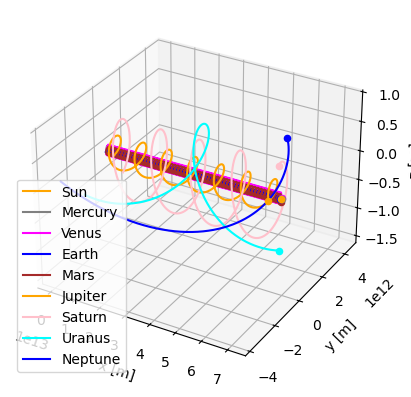

In [7]:
simulation.visualize()

### Matplotlib Animation

For a matplotlib animation, the figure_name (str) needs to be provided without any file extension and the animate flag needs to turned to True.

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 11.3.0 (conda-forge gcc 11.3.0-19)
  configuration: --prefix=/home/sathya/miniconda3/envs/cosmicball --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1674566204550/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1674566204550/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1674566204550/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1674566204550/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-vaapi --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-stati

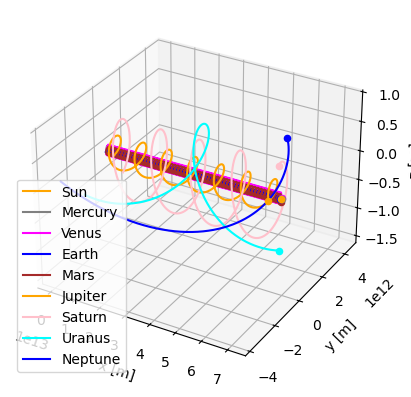

In [8]:
simulation.visualize(figure_name="Solar_System", animate=True)